In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("..")
from utils import read_aws_csv

In [3]:
# aws s3 path to figures data
figure_data_path = "s3://pert-spectra/figures/"

# Time complexity

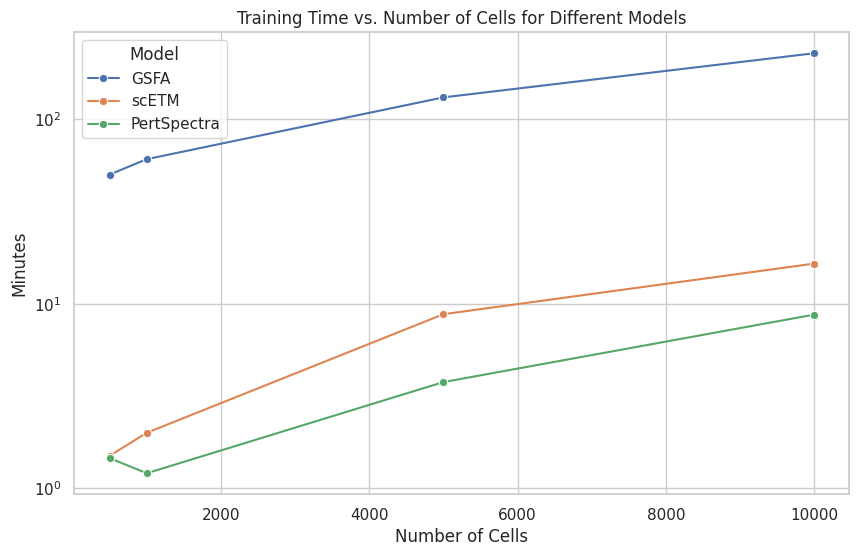

In [6]:
# Load the data
time_df = read_aws_csv(figure_data_path + "runtime/time_complexity_cells.txt", sep=",")
time_df[" time"] = time_df[" time"] / 60  # Convert time to minutes

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
sns.lineplot(data=time_df, x=" cells", y=" time", hue="model", marker="o")

# Add labels and title
plt.xlabel("Number of Cells")
plt.ylabel("Minutes")
plt.title("Training Time vs. Number of Cells for Different Models")
plt.legend(title="Model")
plt.grid(True)
plt.yscale("log")  # Optional: Use logarithmic scale for y-axis for better visualization

# Show plot
plt.savefig("figure_pngs/training_runtime_cells.png", dpi=600, bbox_inches="tight")
plt.show()

# Reconstruction - Spearman Correlation

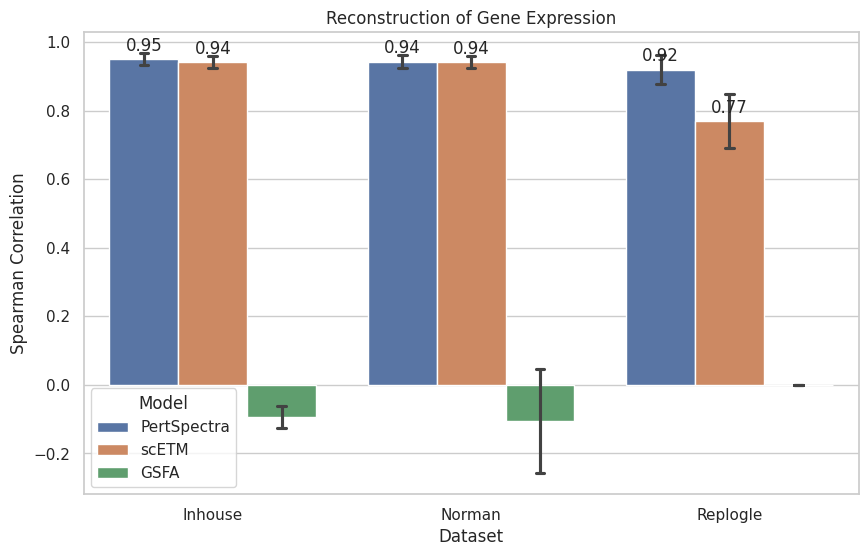

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

recon_path = "reconstruction_spearmans/"
data = {
    "Inhouse": {
        "PertSpectra": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "pertspectra_inhouse_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "scETM": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "scETM_inhouse_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "GSFA": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "GSFA_inhouse_spearman_correlations.csv",
                header=None,
            )[0]
        ),
    },
    "Norman": {
        "PertSpectra": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "pertspectra_norman_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "scETM": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "scETM_norman_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "GSFA": list(
            read_aws_csv(
                figure_data_path + recon_path + "GSFA_norman_spearman_correlations.csv",
                header=None,
            )[0]
        ),
    },
    "Replogle": {
        "PertSpectra": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "pertspectra_replogle_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "scETM": list(
            read_aws_csv(
                figure_data_path
                + recon_path
                + "scETM_replogle_spearman_correlations.csv",
                header=None,
            )[0]
        ),
        "GSFA": [
            0
            for _ in range(
                len(
                    list(
                        read_aws_csv(
                            figure_data_path
                            + recon_path
                            + "scETM_replogle_spearman_correlations.csv",
                            header=None,
                        )[0]
                    )
                )
            )
        ],
    },
}

# Prepare data for Seaborn
records = []
for dataset in data:
    for model in data[dataset]:
        for value in data[dataset][model]:
            records.append(
                {"Dataset": dataset, "Model": model, "Spearman Correlation": value}
            )

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(
    x="Dataset",
    y="Spearman Correlation",
    hue="Model",
    data=df,
    errorbar="sd",
    capsize=0.1,
)

# Optionally add text labels above the bars
for i, p in enumerate(ax.patches):
    if i == 6:
        break
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Add a title and labels
ax.set_title("Reconstruction of Gene Expression")
ax.set_ylabel("Spearman Correlation")

# Show legend and plot
plt.legend(title="Model")
plt.savefig("figure_pngs/recon.png", dpi=600, bbox_inches="tight")
plt.show()

# Signal Recovery/Interpretability of Factors

In [8]:
# csvs containing pvalues per perturbation from the hypergeometric tests
model_recovery_inhouse = read_aws_csv(
    figure_data_path
    + "process_recovery_hypergeo_pvals/pertspectra_inhouse_hypergeo_neighbors_recovery_pvalues.csv",
    header=None,
)
gsfa_recovery_inhouse = read_aws_csv(
    figure_data_path
    + "process_recovery_hypergeo_pvals/GSFA_inhouse_hypergeo_neighbors_recovery_pvalues.csv",
    header=None,
)
model_recovery_norman = read_aws_csv(
    figure_data_path
    + "process_recovery_hypergeo_pvals/pertspectra_norman_hypergeo_neighbors_recovery_pvalues.csv",
    header=None,
)
gsfa_recovery_norman = read_aws_csv(
    figure_data_path
    + "process_recovery_hypergeo_pvals/GSFA_norman_hypergeo_neighbors_recovery_pvalues.csv",
    header=None,
)
model_recovery_replogle = read_aws_csv(
    figure_data_path
    + "process_recovery_hypergeo_pvals/pertspectra_replogle_hypergeo_neighbors_recovery_pvalues.csv",
    header=None,
)

In [9]:
# inhouse
assert len(model_recovery_inhouse) == len(gsfa_recovery_inhouse)
df = model_recovery_inhouse.merge(gsfa_recovery_inhouse, left_on=0, right_on=0)
model_inhouse_recovered = 0
gsfa_inhouse_recovered = 0
for i, row in df.iterrows():
    if row["1_x"] < 0.001:
        model_inhouse_recovered += 1
    if row["1_y"] < 0.001:
        gsfa_inhouse_recovered += 1
model_inhouse_recovered /= len(model_recovery_inhouse)
gsfa_inhouse_recovered /= len(gsfa_recovery_inhouse)

In [10]:
# norman
assert len(model_recovery_norman) == len(gsfa_recovery_norman)
df = model_recovery_norman.merge(gsfa_recovery_norman, left_on=0, right_on=0)
model_norman_recovered = 0
gsfa_norman_recovered = 0
for i, row in df.iterrows():
    if row["1_x"] < 0.001:
        model_norman_recovered += 1
    if row["1_y"] < 0.001:
        gsfa_norman_recovered += 1
model_norman_recovered /= len(model_recovery_norman)
gsfa_norman_recovered /= len(gsfa_recovery_norman)

In [11]:
# replogle
model_replogle_recovered = 0
for i, row in model_recovery_replogle.iterrows():
    if row[1] < 0.001:
        model_replogle_recovered += 1
model_replogle_recovered /= len(model_recovery_replogle)

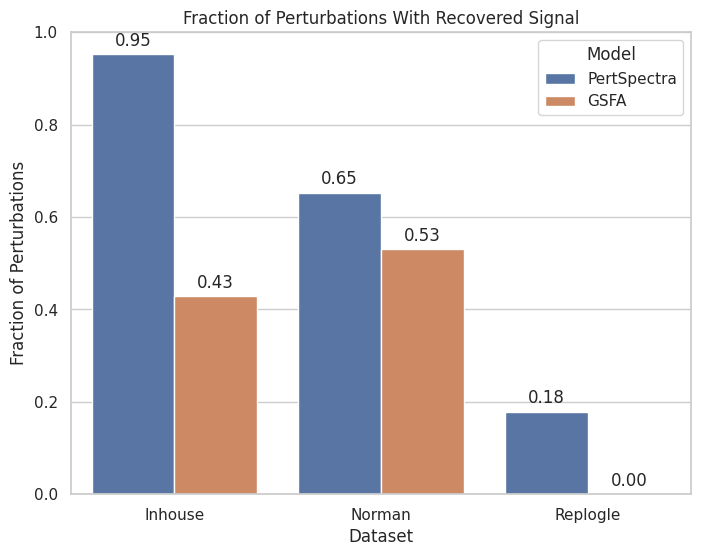

In [12]:
# plot fraction of perturbations recovered
# Define the metrics
datasets = ["Inhouse", "Norman", "Replogle"]
models = ["PertSpectra", "GSFA"]
values = {
    "Inhouse": [model_inhouse_recovered, gsfa_inhouse_recovered],
    "Norman": [model_norman_recovered, gsfa_norman_recovered],
    "Replogle": [model_replogle_recovered, 0.0],
}

# Prepare data in long-form for Seaborn
records = []
for dataset in datasets:
    for i, model in enumerate(models):
        records.append(
            {
                "Dataset": dataset,
                "Model": model,
                "Fraction of Perturbations": values[dataset][i],
            }
        )

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(
    x="Dataset", y="Fraction of Perturbations", hue="Model", data=df, errorbar=None
)

# Add a title and labels
ax.set_title("Fraction of Perturbations With Recovered Signal")
ax.set_ylabel("Fraction of Perturbations")

# Optionally add text labels above the bars
for i, p in enumerate(ax.patches):
    if i == 6:
        break
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Show legend and plot
plt.legend(title="Model")
plt.savefig("recovered_GO.png", dpi=600, bbox_inches="tight")
plt.show()

# AUPRC

In [11]:
# csvs containing recall metrics
model_aucpr_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_inhouse_aucpr.csv"
)
scETM_aucpr_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_inhouse_aucpr.csv"
)
gsfa_aucpr_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/GSFA_inhouse_aucpr.csv"
)
model_aucpr_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_norman_aucpr.csv"
)
scETM_aucpr_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_norman_aucpr.csv"
)
gsfa_aucpr_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/GSFA_norman_aucpr.csv"
)
model_aucpr_replogle = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_replogle_aucpr.csv"
)
scETM_aucpr_replogle = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_replogle_aucpr.csv"
)

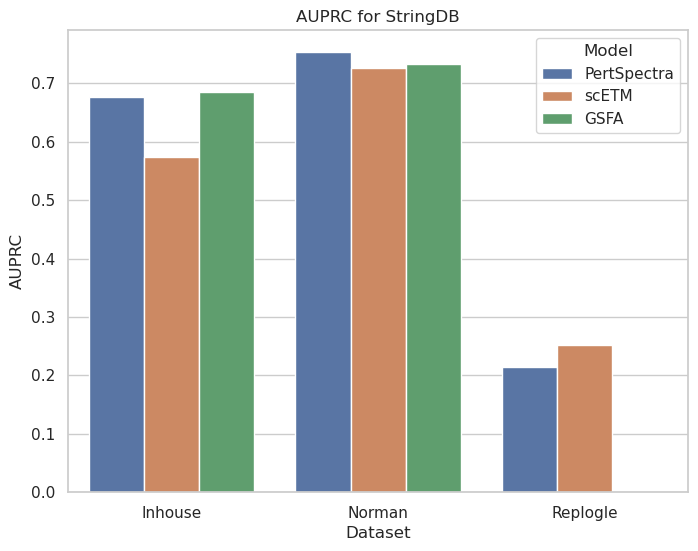

In [12]:
# StringDb recall
data = {
    "Inhouse": {
        "PertSpectra": model_aucpr_inhouse[["AUC"]].iloc[0].values[0],
        "scETM": scETM_aucpr_inhouse[["AUC"]].iloc[0].values[0],
        "GSFA": gsfa_aucpr_inhouse[["AUC"]].iloc[0].values[0],
    },
    "Norman": {
        "PertSpectra": model_aucpr_norman[["AUC"]].iloc[0].values[0],
        "scETM": scETM_aucpr_norman[["AUC"]].iloc[0].values[0],
        "GSFA": gsfa_aucpr_norman[["AUC"]].iloc[0].values[0],
    },
    "Replogle": {
        "PertSpectra": model_aucpr_replogle[["AUC"]].iloc[0].values[0],
        "scETM": scETM_aucpr_replogle[["AUC"]].iloc[0].values[0],
        "GSFA": 0,
    },
}

datasets = data.keys()
model_labels = ["PertSpectra", "scETM", "GSFA"]

# Prepare data in long-form for Seaborn
records = []
for dataset in datasets:
    for model in model_labels:
        records.append(
            {"Dataset": dataset, "Model": model, "AUPRC": data[dataset][model]}
        )

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Dataset", y="AUPRC", hue="Model", data=df, errorbar=None)

# Add a title and labels
ax.set_title("AUPRC for StringDB")
ax.set_ylabel("AUPRC")

# Show legend and plot
plt.legend(title="Model")
plt.savefig("figure_pngs/auprc_stringdb.png", dpi=600, bbox_inches="tight")
plt.show()

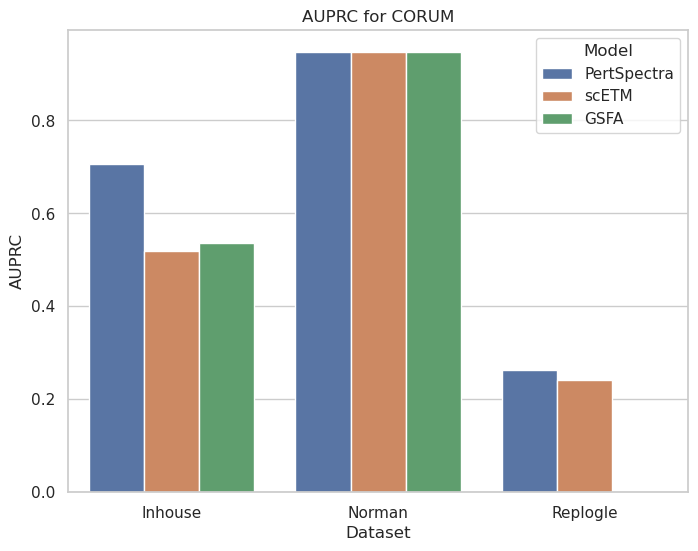

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Example data setup (assuming model_aucpr_*, scETM_aucpr_*, etc. are appropriately defined DataFrames)
data = {
    "Inhouse": {
        "PertSpectra": model_aucpr_inhouse[["AUC"]].iloc[1].values[0],
        "scETM": scETM_aucpr_inhouse[["AUC"]].iloc[1].values[0],
        "GSFA": gsfa_aucpr_inhouse[["AUC"]].iloc[1].values[0],
    },
    "Norman": {
        "PertSpectra": model_aucpr_norman[["AUC"]].iloc[1].values[0],
        "scETM": scETM_aucpr_norman[["AUC"]].iloc[1].values[0],
        "GSFA": gsfa_aucpr_norman[["AUC"]].iloc[1].values[0],
    },
    "Replogle": {
        "PertSpectra": model_aucpr_replogle[["AUC"]].iloc[1].values[0],
        "scETM": scETM_aucpr_replogle[["AUC"]].iloc[1].values[0],
        "GSFA": 0,
    },
}

datasets = data.keys()
model_labels = ["PertSpectra", "scETM", "GSFA"]

# Prepare data in long-form for Seaborn
records = []
for dataset in datasets:
    for model in model_labels:
        records.append(
            {"Dataset": dataset, "Model": model, "AUPRC": data[dataset][model]}
        )

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Dataset", y="AUPRC", hue="Model", data=df, errorbar=None)

# Add a title and labels
ax.set_title("AUPRC for CORUM")
ax.set_ylabel("AUPRC")

# Show legend and plot
plt.legend(title="Model")
plt.savefig("figure_pngs/auprc_corum.png", dpi=600, bbox_inches="tight")
plt.show()

# Best F1

In [14]:
# csvs containing recall metrics
pertspectra_f1_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_inhouse_f1.csv"
)
scETM_f1_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_inhouse_f1.csv"
)
gsfa_f1_inhouse = read_aws_csv(
    figure_data_path + "pert_embedding_recall/GSFA_inhouse_f1.csv"
)
pertspectra_f1_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_norman_f1.csv"
)
scETM_f1_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_norman_f1.csv"
)
gsfa_f1_norman = read_aws_csv(
    figure_data_path + "pert_embedding_recall/GSFA_norman_f1.csv"
)
pertspectra_f1_replogle = read_aws_csv(
    figure_data_path + "pert_embedding_recall/pertspectra_replogle_f1.csv"
)
scETM_f1_replogle = read_aws_csv(
    figure_data_path + "pert_embedding_recall/scETM_replogle_f1.csv"
)

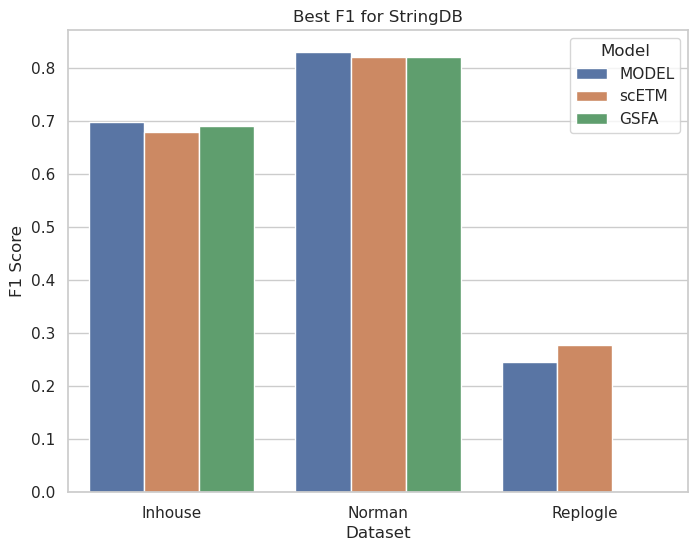

In [15]:
data = {
    "Inhouse": {
        "PertSpectra": pertspectra_f1_inhouse[["F1"]].iloc[0].values[0],
        "scETM": scETM_f1_inhouse[["F1"]].iloc[0].values[0],
        "GSFA": gsfa_f1_inhouse[["F1"]].iloc[0].values[0],
    },
    "Norman": {
        "PertSpectra": pertspectra_f1_norman[["F1"]].iloc[0].values[0],
        "scETM": scETM_f1_norman[["F1"]].iloc[0].values[0],
        "GSFA": gsfa_f1_norman[["F1"]].iloc[0].values[0],
    },
    "Replogle": {
        "PertSpectra": pertspectra_f1_replogle[["F1"]].iloc[0].values[0],
        "scETM": scETM_f1_replogle[["F1"]].iloc[0].values[0],
        "GSFA": 0,
    },
}

datasets = data.keys()
model_labels = ["PertSpectra", "scETM", "GSFA"]

# Prepare data in long-form for Seaborn
records = []
for dataset in datasets:
    for model in model_labels:
        records.append({"Dataset": dataset, "Model": model, "F1": data[dataset][model]})

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Dataset", y="F1", hue="Model", data=df, errorbar=None)

# Add a title and labels
ax.set_title("Best F1 for StringDB")
ax.set_ylabel("F1 Score")

# Show legend and plot
plt.legend(title="Model")
# plt.savefig('figure_pngs/f1_stringdb.png', dpi=600, bbox_inches='tight')
plt.show()

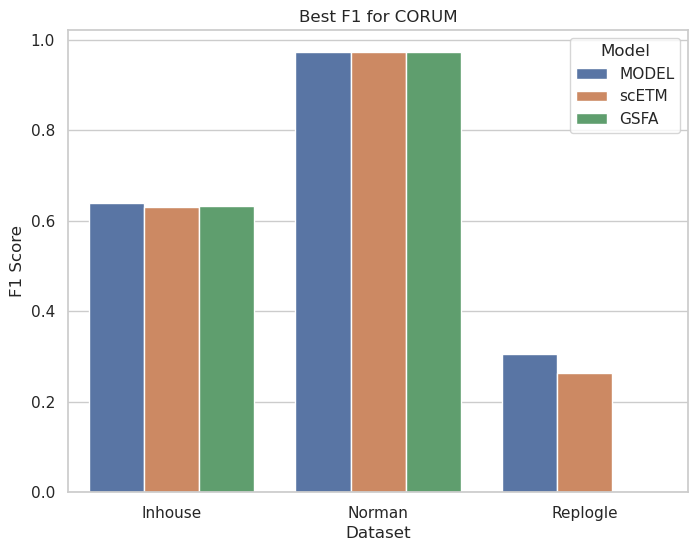

In [16]:
# Assuming the model_f1_* variables are DataFrames with F1 scores
data = {
    "Inhouse": {
        "PertSpectra": pertspectra_f1_inhouse[["F1"]].iloc[1].values[0],
        "scETM": scETM_f1_inhouse[["F1"]].iloc[1].values[0],
        "GSFA": gsfa_f1_inhouse[["F1"]].iloc[1].values[0],
    },
    "Norman": {
        "PertSpectra": pertspectra_f1_norman[["F1"]].iloc[1].values[0],
        "scETM": scETM_f1_norman[["F1"]].iloc[1].values[0],
        "GSFA": gsfa_f1_norman[["F1"]].iloc[1].values[0],
    },
    "Replogle": {
        "PertSpectra": pertspectra_f1_replogle[["F1"]].iloc[1].values[0],
        "scETM": scETM_f1_replogle[["F1"]].iloc[1].values[0],
        "GSFA": 0,
    },
}

datasets = data.keys()
model_labels = ["PertSpectra", "scETM", "GSFA"]

# Prepare data in long-form for Seaborn
records = []
for dataset in datasets:
    for model in model_labels:
        records.append({"Dataset": dataset, "Model": model, "F1": data[dataset][model]})

df = pd.DataFrame(records)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot with Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="Dataset", y="F1", hue="Model", data=df, errorbar=None)

# Add a title and labels
ax.set_title("Best F1 for CORUM")
ax.set_ylabel("F1 Score")

# Show legend and plot
plt.legend(title="Model")
# plt.savefig('figure_pngs/f1_corum.png', dpi=600, bbox_inches='tight')
plt.show()